# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.14/x64/bin/python -m pip install --upgrade pip' command.


#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


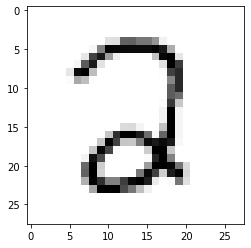

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2396
Training Accuracy: 0.7244, Testing Accuracy: 0.7198



Epoch 10, Loss 0.0665
Training Accuracy: 0.9308, Testing Accuracy: 0.9441



Epoch 20, Loss 0.0459
Training Accuracy: 0.9469, Testing Accuracy: 0.9597



Epoch 30, Loss 0.0384
Training Accuracy: 0.9547, Testing Accuracy: 0.9642



Epoch 40, Loss 0.0343
Training Accuracy: 0.9592, Testing Accuracy: 0.9682



Epoch 50, Loss 0.0315
Training Accuracy: 0.9630, Testing Accuracy: 0.9693



Epoch 60, Loss 0.0294
Training Accuracy: 0.9655, Testing Accuracy: 0.9723



Epoch 70, Loss 0.0277
Training Accuracy: 0.9673, Testing Accuracy: 0.9723



Epoch 80, Loss 0.0263
Training Accuracy: 0.9694, Testing Accuracy: 0.9728



Epoch 90, Loss 0.0251
Training Accuracy: 0.9704, Testing Accuracy: 0.9753



Epoch 100, Loss 0.024
Training Accuracy: 0.9715, Testing Accuracy: 0.9763



Epoch 110, Loss 0.0231
Training Accuracy: 0.9735, Testing Accuracy: 0.9758



Epoch 120, Loss 0.0222
Training Accuracy: 0.9745, Testing Accuracy: 0.9763



Epoch 130, Loss 0.0214
Training Accuracy: 0.9756, Testing Accuracy: 0.9773



Epoch 140, Loss 0.0207
Training Accuracy: 0.9762, Testing Accuracy: 0.9783



Epoch 150, Loss 0.02
Training Accuracy: 0.9774, Testing Accuracy: 0.9793



Epoch 160, Loss 0.0194
Training Accuracy: 0.9785, Testing Accuracy: 0.9798



Epoch 170, Loss 0.0188
Training Accuracy: 0.9796, Testing Accuracy: 0.9798



Epoch 180, Loss 0.0182
Training Accuracy: 0.9804, Testing Accuracy: 0.9798



Epoch 190, Loss 0.0177
Training Accuracy: 0.9811, Testing Accuracy: 0.9798



Epoch 200, Loss 0.0172
Training Accuracy: 0.9818, Testing Accuracy: 0.9798



Epoch 210, Loss 0.0167
Training Accuracy: 0.9821, Testing Accuracy: 0.9798



Epoch 220, Loss 0.0163
Training Accuracy: 0.9822, Testing Accuracy: 0.9798



Epoch 230, Loss 0.0158
Training Accuracy: 0.9828, Testing Accuracy: 0.9798



Epoch 240, Loss 0.0154
Training Accuracy: 0.9832, Testing Accuracy: 0.9808



Epoch 250, Loss 0.015
Training Accuracy: 0.9837, Testing Accuracy: 0.9808



0.0015585126377849377

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2459
Training Accuracy: 0.6607, Testing Accuracy: 0.7046



Epoch 10, Loss 0.1045
Training Accuracy: 0.9019, Testing Accuracy: 0.9118



Epoch 20, Loss 0.0806
Training Accuracy: 0.9233, Testing Accuracy: 0.9335



Epoch 30, Loss 0.0693
Training Accuracy: 0.9335, Testing Accuracy: 0.9441



Epoch 40, Loss 0.0625
Training Accuracy: 0.9390, Testing Accuracy: 0.9511



Epoch 50, Loss 0.0578
Training Accuracy: 0.9432, Testing Accuracy: 0.9526



Epoch 60, Loss 0.0544
Training Accuracy: 0.9468, Testing Accuracy: 0.9536



Epoch 70, Loss 0.0518
Training Accuracy: 0.9484, Testing Accuracy: 0.9561



Epoch 80, Loss 0.0496
Training Accuracy: 0.9500, Testing Accuracy: 0.9602



Epoch 90, Loss 0.0479
Training Accuracy: 0.9512, Testing Accuracy: 0.9612



Epoch 100, Loss 0.0464
Training Accuracy: 0.9525, Testing Accuracy: 0.9617



Epoch 110, Loss 0.0452
Training Accuracy: 0.9533, Testing Accuracy: 0.9617



Epoch 120, Loss 0.0441
Training Accuracy: 0.9543, Testing Accuracy: 0.9622



Epoch 130, Loss 0.0431
Training Accuracy: 0.9545, Testing Accuracy: 0.9632



Epoch 140, Loss 0.0423
Training Accuracy: 0.9554, Testing Accuracy: 0.9642



Epoch 150, Loss 0.0415
Training Accuracy: 0.9560, Testing Accuracy: 0.9637



Epoch 160, Loss 0.0408
Training Accuracy: 0.9567, Testing Accuracy: 0.9647



Epoch 170, Loss 0.0402
Training Accuracy: 0.9570, Testing Accuracy: 0.9652



Epoch 180, Loss 0.0396
Training Accuracy: 0.9576, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0391
Training Accuracy: 0.9584, Testing Accuracy: 0.9667



Epoch 200, Loss 0.0386
Training Accuracy: 0.9588, Testing Accuracy: 0.9677



Epoch 210, Loss 0.0382
Training Accuracy: 0.9593, Testing Accuracy: 0.9677



Epoch 220, Loss 0.0378
Training Accuracy: 0.9594, Testing Accuracy: 0.9677



Epoch 230, Loss 0.0374
Training Accuracy: 0.9596, Testing Accuracy: 0.9688



Epoch 240, Loss 0.037
Training Accuracy: 0.9598, Testing Accuracy: 0.9682



Epoch 250, Loss 0.0367
Training Accuracy: 0.9599, Testing Accuracy: 0.9682



0.008923911778828387

### Comparing results of NN and LR

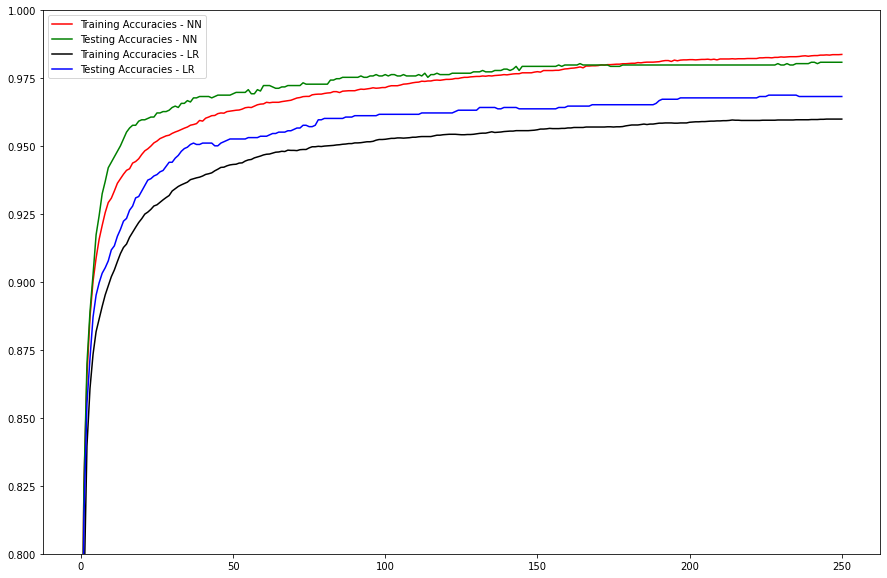

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

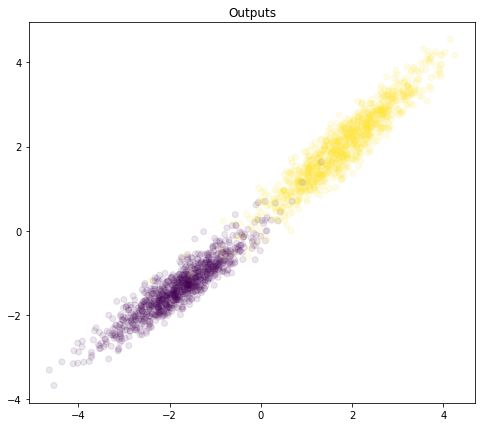

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

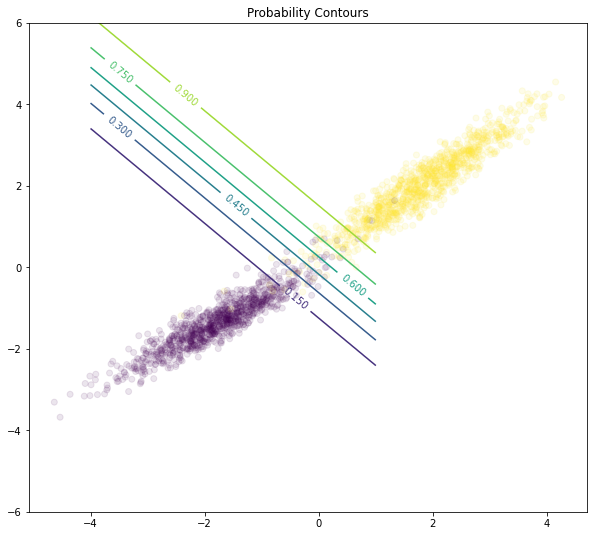

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );